# Implementation K-Means clustering on the Iris dataset using sklearn. 

In [1]:
# Importing essential liabraries
import pandas as pd   # For data analysis and manipulation

import numpy as np   # For numerical operations

import matplotlib.pyplot as plt   # For Visualization

import seaborn as sns   # For Plotting

from sklearn.cluster import KMeans   # To use KMeans clustering model

from sklearn import datasets   # To load the Iris dataset

from mpl_toolkits import mplot3d   # For 3D Plotting

In [2]:
# Loading Iris Dataset
data = datasets.load_iris()

# Seperating data into Dependent (x) and Independent (y) Variables
x = data.data
y = data.target

C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: 

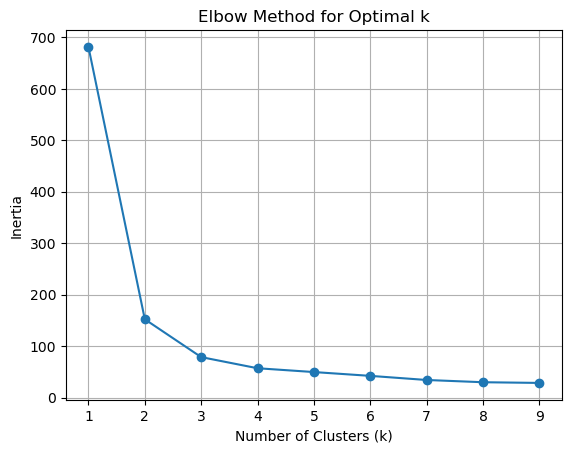

In [3]:
# Elbow method to find optimal number of clusters
inertias = []
cluster_range = range(1, 10)  # Try k from 1 to 9

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

**The point at which the elbow shape is created is 3; that is, our K value or an optimal number of clusters is 3. Now let’s train the model on the input data with a number of clusters 3.**

#

In [4]:
# Training the Model
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\admin\Downloads\Anaconda Files\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


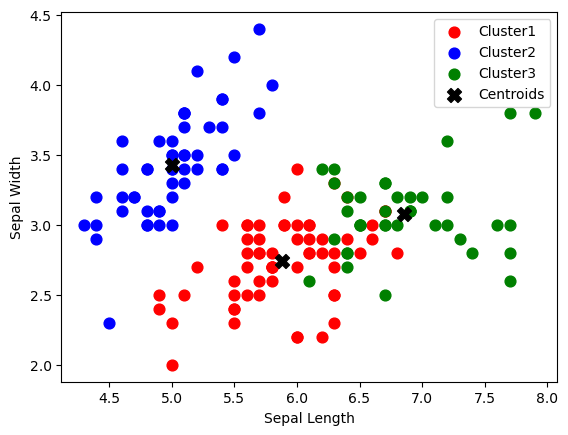

In [5]:
# Visualizing Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster3')
 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids', marker='X')
plt.legend() 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

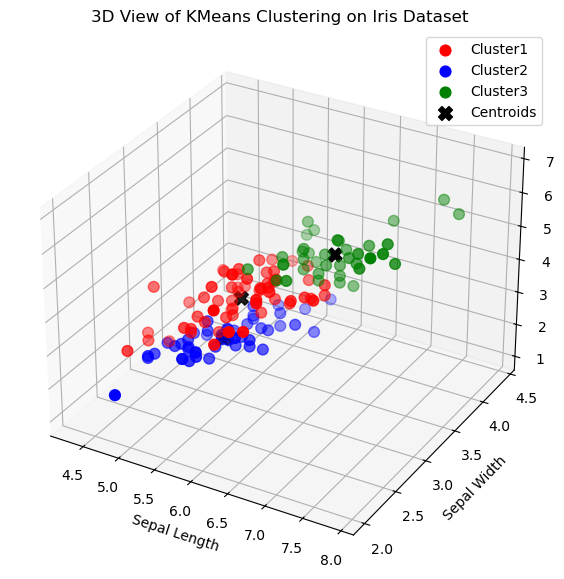

In [6]:
# 3D Plotting :
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting clusters
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], c='red', s=60, label='Cluster1')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2], c='blue', s=60, label='Cluster2')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2], c='green', s=60, label='Cluster3')

# Plotting centroids
ax.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 2], 
           s=100, c='black', label='Centroids', marker='X')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.title('3D View of KMeans Clustering on Iris Dataset')
plt.show()


#

### Evaluating the performance of the Model :


1. **Silhouette Score :**
    - Measures how similar a point is to its own cluster vs other clusters.
    - Range: –1 to 1
    - Interpretation: Higher is better (close to 1 means well-clustered)

In [7]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, y_kmeans)
print("Silhouette Score:", score)

Silhouette Score: 0.5511916046195919


###

2. **Inertia (Within-cluster Sum of Squares :**
    - Measures compactness of clusters (lower is better).
    - Used in elbow method to find the optimal number of clusters.
    - Range: 0 to ∞ (no upper bound)
    -  A lower inertia means tighter clusters.

In [8]:
print("Inertia:", kmeans.inertia_)

Inertia: 78.8556658259773


###

3. **Calinski-Harabasz Index :**
    -  Ratio of between-cluster dispersion to within-cluster dispersion.
    -  Higher is better.

In [9]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(x, y_kmeans)
print("Calinski-Harabasz Score:", score)

Calinski-Harabasz Score: 561.593732015664


###

4. **Davies-Bouldin Index :**
    - Average similarity between each cluster and its most similar one.
    - Lower is better.

In [10]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(x, y_kmeans)
print("Davies-Bouldin Score:", score)

Davies-Bouldin Score: 0.6660385791628491
